<a href="https://colab.research.google.com/github/JungMYEONG-jin/Stats_Project/blob/window/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np
import pandas as pd

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

## 최대 길이 알아보기

In [5]:
max(max(seq) for seq in train_data)

9999

In [6]:
w_idx = imdb.get_word_index()
r_idx = dict([val, key] for (key, val) in w_idx.items())

1646592/1641221 [==============================] - 0s 0us/step


In [10]:
w_idx

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [11]:
r_idx

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

## Decode the review not that our indices were offest by 3
## because 0, 1, 2 are reserved indces for "padding", "start of sequence", "unknown"

In [8]:
decoded = ' '.join(r_idx.get(i-3,'?') for i in train_data[0])

In [9]:
decoded

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Preparing data.
## vectorize sequence!

In [13]:
# make a function to vectorize
def seq_to_vec(seq, dim=10000):
  res = np.zeros((len(seq), dim))
  for i, s in enumerate(seq):
    res[i,s] = 1.
  return res


train_x = seq_to_vec(train_data)
test_x = seq_to_vec(test_data)

In [15]:
train_x[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
# vectorized labels
train_y = np.asarray(train_labels).astype('float32')
test_y = np.asarray(test_labels).astype('float32')

In [22]:
print(train_x.shape, '\n', train_y.shape, '\n', test_x.shape, '\n', test_y.shape) # 10000 dimension을가짐

(25000, 10000) 
 (25000,) 
 (25000, 10000) 
 (25000,)


# Sigmoid 1 for remember else 0

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [27]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [28]:
 val_x = train_x[:10000]
 partial_x_train = train_x[10000:]

 val_y = train_y[:10000]
 partial_y_train = train_y[10000:]

In [29]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(val_x, val_y))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.6000 - accuracy: 0.7011 - val_loss: 0.4059 - val_accuracy: 0.8536
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3365 - accuracy: 0.8981 - val_loss: 0.3190 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2381 - accuracy: 0.9307 - val_loss: 0.2833 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1850 - accuracy: 0.9439 - val_loss: 0.2756 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1447 - accuracy: 0.9571 - val_loss: 0.2999 - val_accuracy: 0.8789
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1168 - accuracy: 0.9688 - val_loss: 0.2944 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0994 - accuracy: 0.9729 - val_loss: 0.3214 - val_accuracy: 0.8771
Epoch 8/20
30

In [30]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

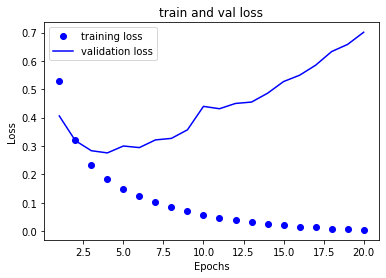

In [32]:
epochs =range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label="training loss")
plt.plot(epochs, val_loss, 'b', label="validation loss")
plt.title("train and val loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## 위 그래프는 overfitting. train loss downs but validation loss grows up

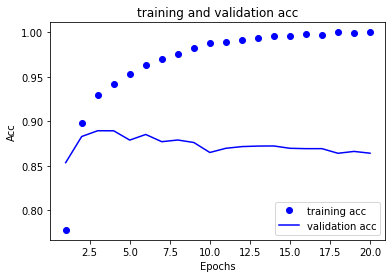

In [35]:
plt.clf()
plt.plot(epochs, acc, 'bo', label="training acc")
plt.plot(epochs, val_acc, 'b', label="validation acc")
plt.title("training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()

plt.show()


In [39]:
model = models.Sequential()
model.add(layers.Dense(16, activation="tanh", input_shape=(10000,)))
model.add(layers.Dense(16, activation="tanh"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(train_x, train_y, epochs=4, batch_size=512)
result = model.evaluate(test_x, test_y)

Epoch 1/4
49/49 [==============================] - 2s 23ms/step - loss: 0.5234 - accuracy: 0.7552
Epoch 2/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2529 - accuracy: 0.9108
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.1736 - accuracy: 0.9411
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3244 - accuracy: 0.8769


In [37]:
result

[0.3037722110748291, 0.8795999884605408]

In [38]:
model.predict(test_x)

array([[0.17632812],
       [0.99922687],
       [0.47112378],
       ...,
       [0.06602648],
       [0.04576647],
       [0.4488106 ]], dtype=float32)